# Youla. Анализ поисковых данных.

In [27]:
import pandas as pd

## Импорт данных

In [4]:
base_types = {'cnt':'Int32'}
key_headers = ['region_id', 'user_id', 'search_id', 'category_id', 'subcategory_id']

views = pd.read_csv(r'.\Data\filter_explore_views.tar.gz', sep='\t', names=key_headers + ['views_cnt'], header=None, skiprows=1, dtype=base_types, error_bad_lines=False, low_memory=False)

contacts = pd.read_csv(r'.\Data\filter_explore_contacts.tar.gz', sep='\t', names=key_headers + ['contacts_cnt'], header=None, skiprows=1, dtype=base_types, error_bad_lines=False, low_memory=False)

search_headers = key_headers + ['default', 'use_category', 'search_text',
'price_filter', 'bs_filter', 'discount_filter', 'delivery_filter',
'distance_filter', 'publication_filter', 'use_properties', 'sorting_published',
'sorting_distance', 'sorting_price']
searches = pd.read_csv(r'.\Data\filter_explore_searches.tar.gz', sep='\t', names=search_headers, header=None, skiprows=1, error_bad_lines=False, low_memory=False)

## Сливаем данные в одну таблицу, добавляем индекс

In [6]:
df = pd.merge(searches, views, how='left', on=key_headers)
df = pd.merge(df, contacts, how='left', on=key_headers)

In [7]:
df.index = range(df.shape[0])

Посмотрим, как выглядит

In [8]:
df.head()

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,views_cnt,contacts_cnt
0,D09AD180D0B0D181D0BDD0BED0B4D0B0D180D181D0BAD0...,30313632666265376337646262666661,6637303136663335373937336235666230306430396564...,5,1F6,other,"1,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
1,D09AD180D0B0D181D0BDD0BED0B4D0B0D180D181D0BAD0...,30313866326433666638326333373138,6539626330383465373331346433616562303135313037...,NaN,NaN,main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
2,D09AD180D0B0D181D0BDD0BED0B4D0B0D180D181D0BAD0...,30316135313065353037343635343432,3935633537363265303339373463643764633739326430...,NaN,NaN,main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
3,D09AD180D0B0D181D0BDD0BED0B4D0B0D180D181D0BAD0...,30323639306161643537383935663331,6630633532393165613830656234353132616335623536...,5,1F6,other,"1,0",NaN,NaN,NaN,NaN,NaN,"1,0",NaN,"1,0",NaN,"1,0",NaN,1.0,NaN
4,D09AD180D0B0D181D0BDD0BED0B4D0B0D180D181D0BAD0...,30326230306261356136623462336138,3166613861666262633130336565386134323662613631...,NaN,NaN,main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN


## Подготовим данные для анализа

Последняя строка содержит пустой search_id, удаляем её.

In [10]:
df = df[~df['search_id'].isna()]

Пропуски заполним

In [11]:
df['user_id'] = df['user_id'].fillna('?')
df['category_id'] = df['category_id'].fillna('?')
df['subcategory_id'] = df['subcategory_id'].fillna('?')

Работать с длинными строками неудобно. Упростим. Для простоты заменим базовые колонки, но на всякий случай сохраним энкодер.

In [12]:
from sklearn import preprocessing

columns_encoders = dict()
def encode_column(df, column_to_encode):    
    encoder = preprocessing.LabelEncoder()
    df[column_to_encode] = encoder.fit_transform(df[column_to_encode])
    columns_encoders[column_to_encode]=encoder

In [13]:
encode_column(df, 'region_id')
encode_column(df, 'user_id')
encode_column(df, 'category_id')
encode_column(df, 'subcategory_id')
encode_column(df, 'search_id')

In [14]:
df.head()

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,views_cnt,contacts_cnt
0,0,1292,2997832,13,28,other,"1,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
1,0,1439,2836667,19,266,main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
2,0,1539,1818367,19,266,main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
3,0,2233,2922196,13,28,other,"1,0",NaN,NaN,NaN,NaN,NaN,"1,0",NaN,"1,0",NaN,"1,0",NaN,1.0,NaN
4,0,2494,385604,19,266,main,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN


Так выглядит гораздо лучше. Колонка default по описанию задачи должна содержать 1, если испльзовался фильтр по-умолчанию. Поправим.

In [15]:
df['default'].unique()

array(['other', 'main'], dtype=object)

Заменим: main -> 1, other -> 0

In [16]:
default_values = { "default":{ "main": 1, "other": 0 } }
df.replace(default_values, inplace=True)

In [17]:
df.head()

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,views_cnt,contacts_cnt
0,0,1292,2997832,13,28,0,"1,0",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
1,0,1439,2836667,19,266,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
2,0,1539,1818367,19,266,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN
3,0,2233,2922196,13,28,0,"1,0",NaN,NaN,NaN,NaN,NaN,"1,0",NaN,"1,0",NaN,"1,0",NaN,1.0,NaN
4,0,2494,385604,19,266,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"1,0",NaN,NaN,NaN


Отлично. А значения типа '1,0' при конвертации в числа приведут к ошибке. Заменяем.

In [18]:
df.replace('1,0', '1', inplace=True)

Остались бинарные признаки (либо 1, либо 0) и количество просмотров/контактов. Можно пустые ячейки заменить на 0. Обновим.

In [19]:
df = df.fillna(0)

In [21]:
df.head()

,region_id,user_id,search_id,category_id,subcategory_id,default,use_category,search_text,price_filter,bs_filter,discount_filter,delivery_filter,distance_filter,publication_filter,use_properties,sorting_published,sorting_distance,sorting_price,views_cnt,contacts_cnt
0,0,1292,2997832,13,28,0,1,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0
1,0,1439,2836667,19,266,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0
2,0,1539,1818367,19,266,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0
3,0,2233,2922196,13,28,0,1,0,0,0,0,0,1,0,1,0,1,0,1.0,0.0
4,0,2494,385604,19,266,1,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0


Посмотрим на типы колонок.

In [22]:
df.dtypes

region_id               int64
user_id                 int64
search_id               int64
category_id             int64
subcategory_id          int64
default                 int64
use_category           object
search_text            object
price_filter           object
bs_filter              object
discount_filter        object
delivery_filter        object
distance_filter        object
publication_filter     object
use_properties         object
sorting_published      object
sorting_distance       object
sorting_price          object
views_cnt             float64
contacts_cnt          float64
dtype: object

Колонки типа object будут мешаться, преобрзауем в числа.

In [23]:
numeric_columns = ['use_category', 'search_text',
'price_filter', 'bs_filter', 'discount_filter', 'delivery_filter',
'distance_filter', 'publication_filter', 'use_properties', 'sorting_published',
'sorting_distance', 'sorting_price']

In [24]:
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

In [25]:
df.dtypes

region_id               int64
user_id                 int64
search_id               int64
category_id             int64
subcategory_id          int64
default                 int64
use_category            int64
search_text             int64
price_filter            int64
bs_filter               int64
discount_filter         int64
delivery_filter         int64
distance_filter         int64
publication_filter      int64
use_properties          int64
sorting_published       int64
sorting_distance        int64
sorting_price           int64
views_cnt             float64
contacts_cnt          float64
dtype: object

Гораздо лучше. И добавим конверсию просмотра в контакт, в конце концов мы хотим получить конверсии.

In [26]:
def get_conversion(row):
    try:
        if row['contacts_cnt'] == 0 or row['views_cnt'] == 0:
            return 0

        return row['contacts_cnt']/row['views_cnt']
    except:
        return 0

df['conversion'] = df.apply(lambda row: get_conversion(row), axis=1)

Посмотрим, что с конверсиями.

In [29]:
with_contacts = df[df['conversion']>0].size
print('Событий с конверсией >0, %: {0}'.format(with_contacts/df.size))
print('По количеству: {0}'.format(with_contacts))

Событий с конверсией >0, %: 0.003041555724762811
По количеству: 198891


Конткт был у относительно небольшого количества пользователей, ~0.3%

In [373]:
df['conversion'].max()

7.0

Неожиданно) Много контактов на один просмотр. Возможно, это хороший знак (была сделка).

## Посмотрим на данные

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_data(df, column, title=''):
    cnt_pro = df[column].value_counts()

    fig = plt.figure(figsize=(14,4))
    sns.barplot(cnt_pro.index, cnt_pro.values, alpha=0.8)
    plt.ylabel('Events', fontsize=12)
    plt.xlabel(column, fontsize=8)
    plt.xticks(rotation=90)
    fig.suptitle(title)
    plt.show();

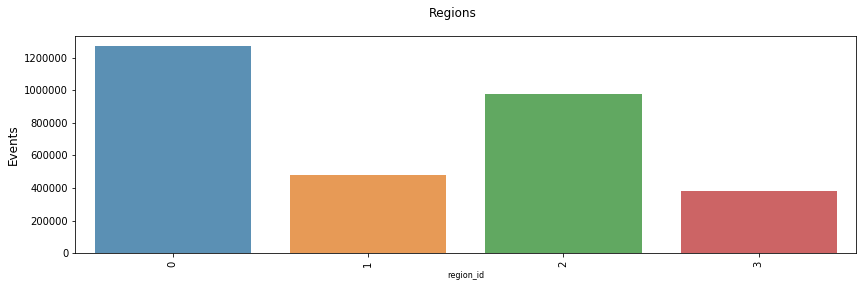

In [31]:
plot_data(df, 'region_id', 'Regions')

Есть предположение, что принадлежность к региону не должа сильно влиять на конверсию. Дальше для анализа возьмем самый большой регион. При необходимости повторим для других.

In [32]:
REGION_ID = 0
df_r = df[df['region_id']==REGION_ID]

Дальше все выкладки для выбранного региона, см. REGION_ID

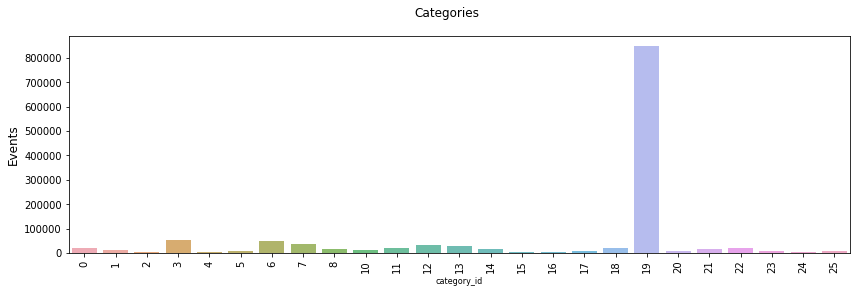

In [33]:
plot_data(df_r, 'category_id', 'Categories')

Что это у нас за категория такая яркая. Хорошо, что сохранили энкодеры.

In [34]:
columns_encoders['category_id'].inverse_transform([19])

array(['?'], dtype=object)

М, ясно. Много событий без поиска по категории. Посмотрим, как вообще распределён поиск по категориям и без.

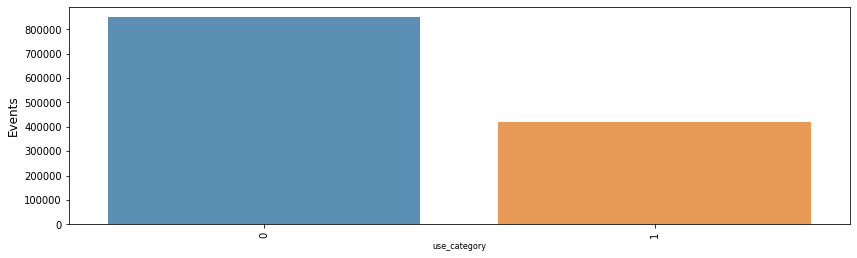

In [35]:
plot_data(df_r, 'use_category')

In [36]:
with_category = df_r[df_r['use_category']==1].size
without_category = df_r[df_r['use_category']!=1].size

print('С категорией: {0}, без категории: {1}\nС категорией, %: {2}'
      .format(with_category, without_category, with_category/(with_category + without_category)))

С категорией: 8806980, без категории: 17829672
С категорией, %: 0.3306338949804953


Ок, треть людей ищет что-то более целенапралвенно по категориям.

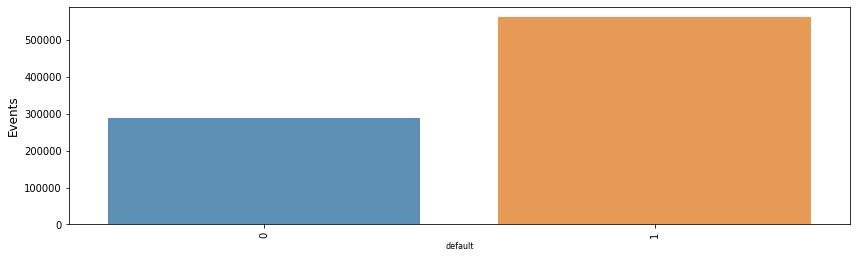

In [37]:
plot_data(df_r[df_r['use_category']==0], 'default')

И большая часть тех, что не испльзует категории использует дефолтный поиск.

In [38]:
without_filters = df_r[df_r['default']==0].size
with_filters = df_r[df_r['default']==1].size

print('Без фильтров: {0}, С фильтрами: {1}\nС фильтрами, %: {2}'
      .format(without_filters, with_filters, with_filters/(with_filters + without_filters)))

Без фильтров: 14850318, С фильтрами: 11786334
С фильтрами, %: 0.44248556462726624


Много пользователей использует фильтры для уточнения поиска. Пока только не ясно влияет ли это на конверсию или нет. И если влияет, то увеличивает или уменьшает. Посмотрим конверсии.

In [39]:
conversions_without_filter = df_r[(df_r['default']==1) & (df_r['conversion']>0)].size
conversions_with_filter = df_r[(df_r['default']==0) & (df_r['conversion']>0)].size

print('Конверсий при дефолтном поиске: {0}, с фильтрами: {1}'.format(conversions_without_filter, conversions_with_filter))

Конверсий при дефолтном поиске: 0, с фильтрами: 84126


Неожиданно... Ну ок. Можно сделать предположение, что подтсройка поиска поможет увеличить конверсию в контакт при дефолтном поиске. Конечно, есть вероятность, что пользователю "обязательно нужно" попробовать что-то подкрутить в фильтрах, чтобы сделать более обоснованную покупку в итоге. Пользователи...)

Попробуем найти параметры, которые чаще приводят к конверсии. Посмотрим на зависимости.

In [42]:
def plot_for_conversions(column):
    plot_data(df_r[df_r['conversion']>0.5], column, 'conversion >0.5')
    plot_data(df_r[df_r['conversion']>0.3], column, 'conversion >0.3')
    plot_data(df_r[df_r['conversion']>0], column, 'conversion >0')
    plot_data(df_r[df_r['conversion']==0], column, 'conversion =0')

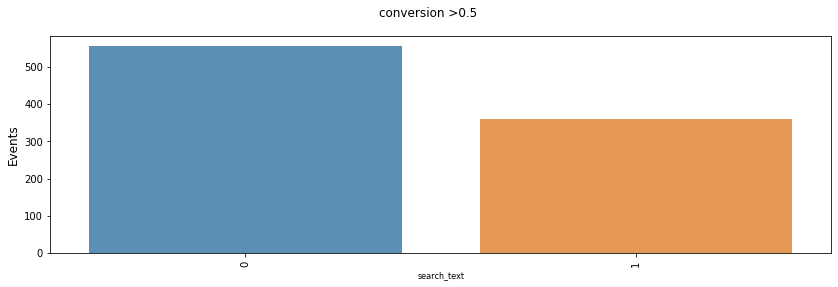

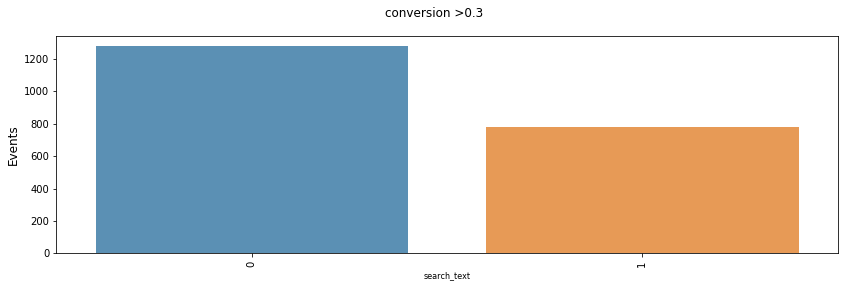

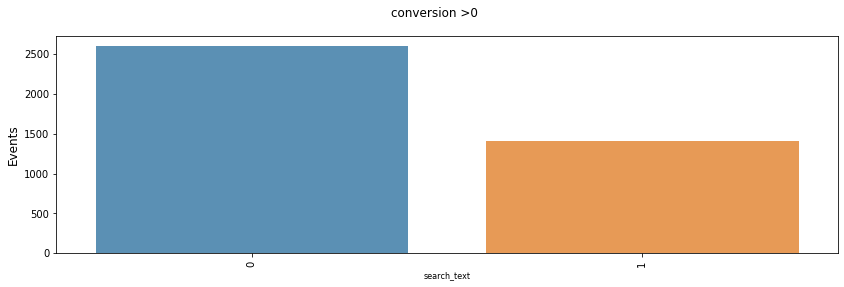

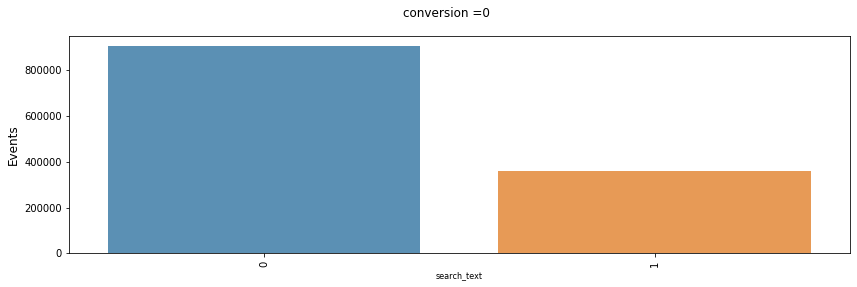

In [44]:
plot_for_conversions('search_text')

Влиять на него мы не можем (писать то не заставим...правда?). Люди далеко не всегда знают, что хотят найти, люблю такое)

In [45]:
with_text = df_r[(df_r['conversion']>0) & (df_r['search_text']==1)].size
all = df_r[df_r['conversion']>0].size

print('Конверсий всего: {0}, С текстом поиска: {1}\nС текстом поиска, %: {2}'
      .format(all, with_text, with_text/all))

Конверсий всего: 84126, С текстом поиска: 29673
С текстом поиска, %: 0.3527209186220669


Ок, идем дальше.

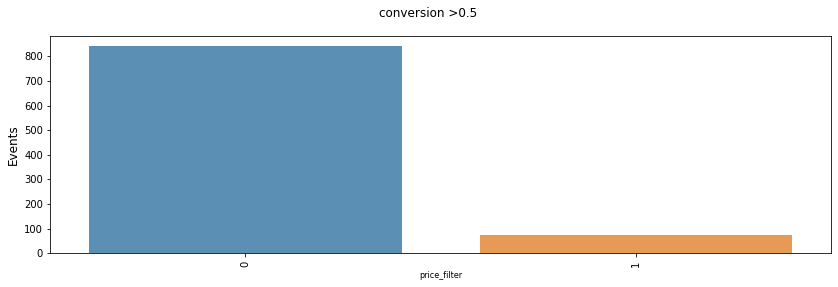

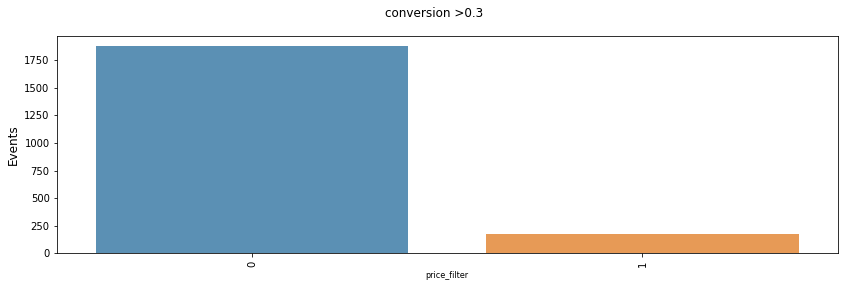

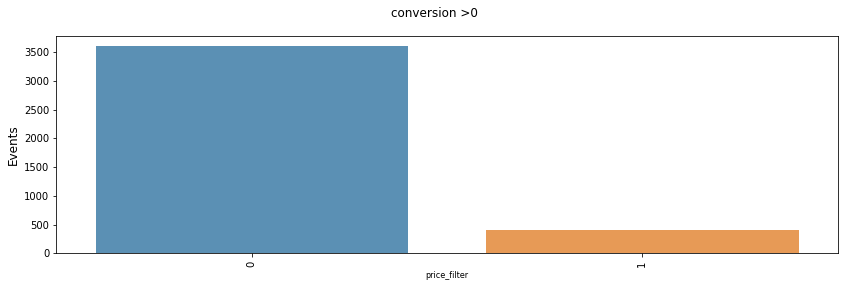

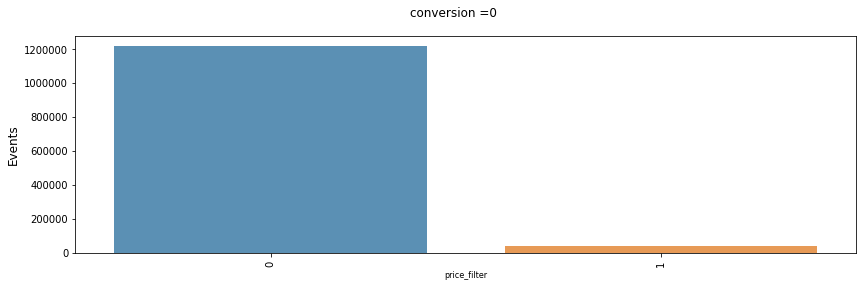

In [46]:
plot_for_conversions('price_filter')

Влиять на то, указывает пользователь цену или нет - мы не можем. Но, пользователи, которые более конкретно указывают диапазон - конвертируются в контакты лучше. 

#assumption Зная, какую цену "обычно" пользователи считают нормальной (потом покупают) для категории товара, можно подтюнить ранжирование так, чтобы товары в этой ценовой категории были выше.

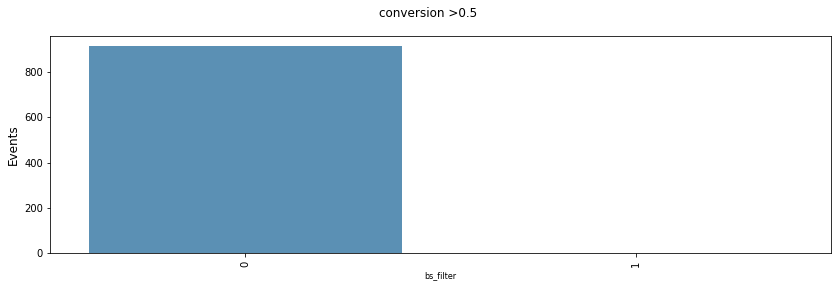

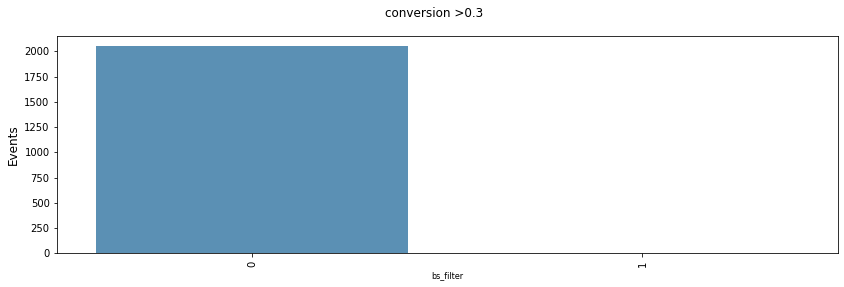

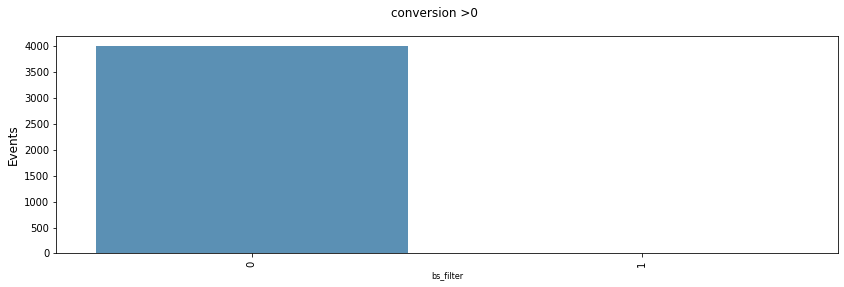

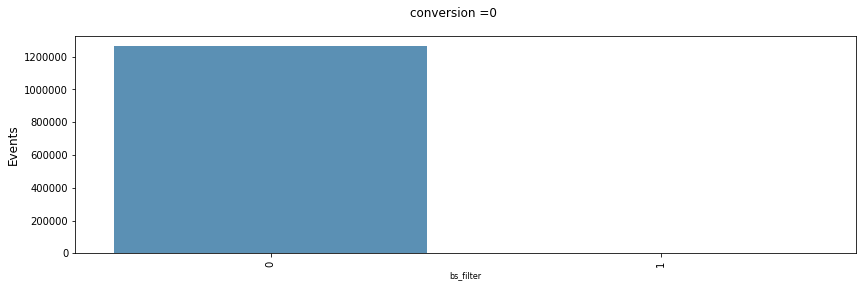

In [47]:
plot_for_conversions('bs_filter')

Не влияет особенно. Либо пользователи не пугливые, либо сервис и так предлагает большое количество безопасных сделок. Смотрим дальше.

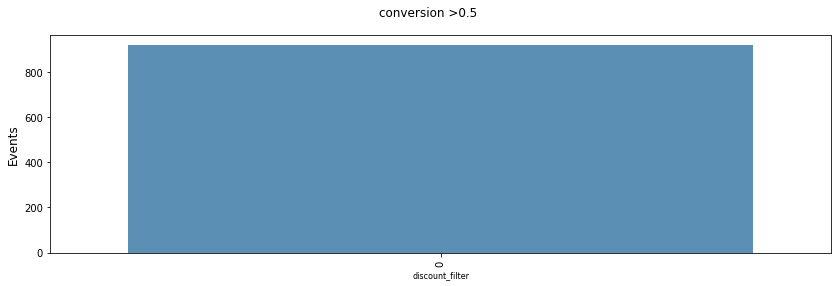

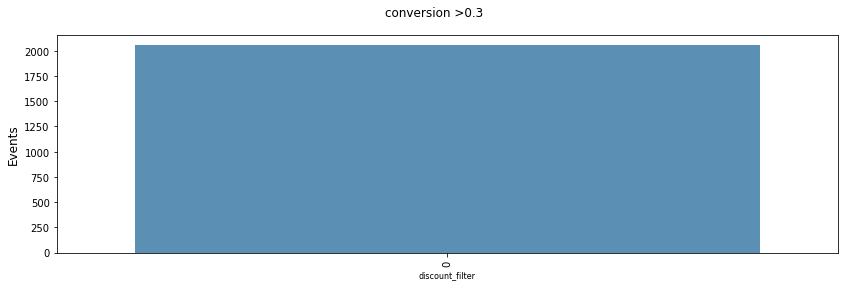

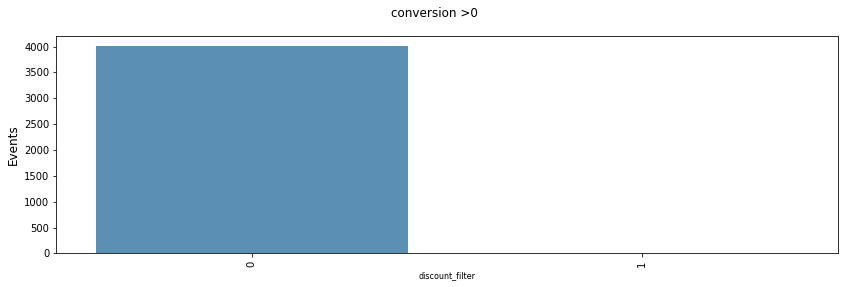

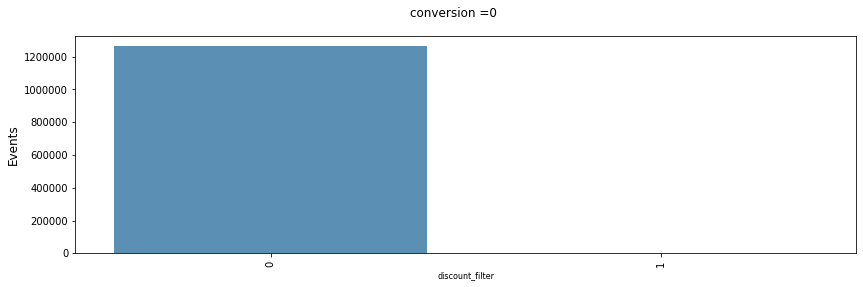

In [48]:
plot_for_conversions('discount_filter')

И не этот парамерт... Выбор тоавров "со скидкой" не помогает. Приелись скидки пользователям.

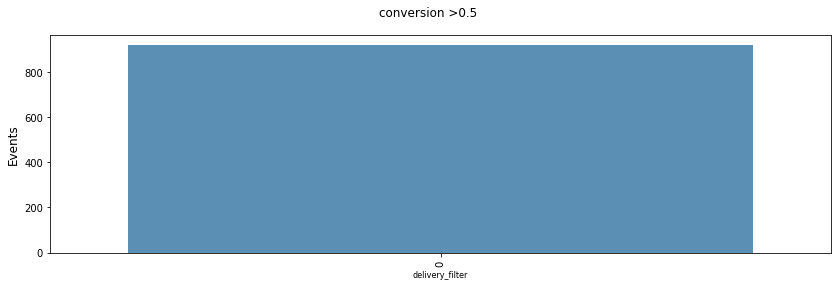

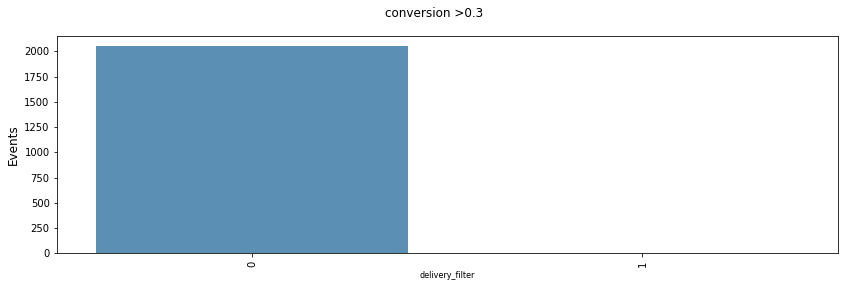

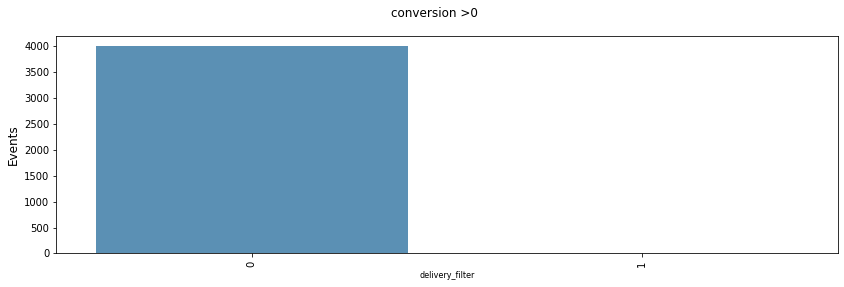

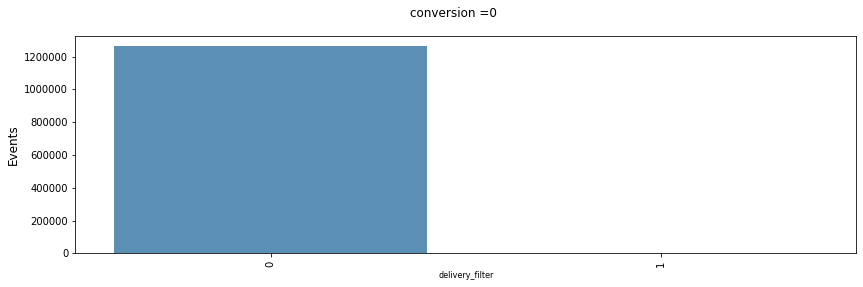

In [49]:
plot_for_conversions('delivery_filter')

Не он... Ок, дальше.

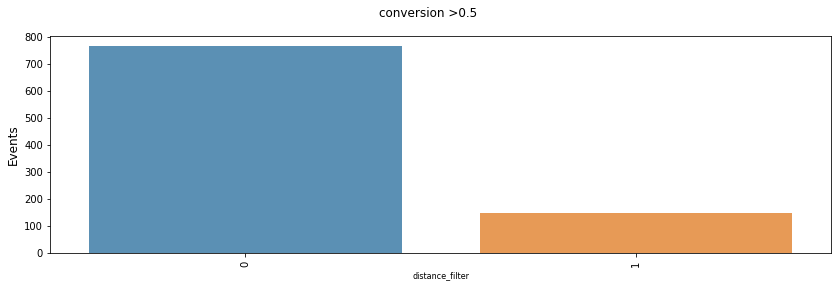

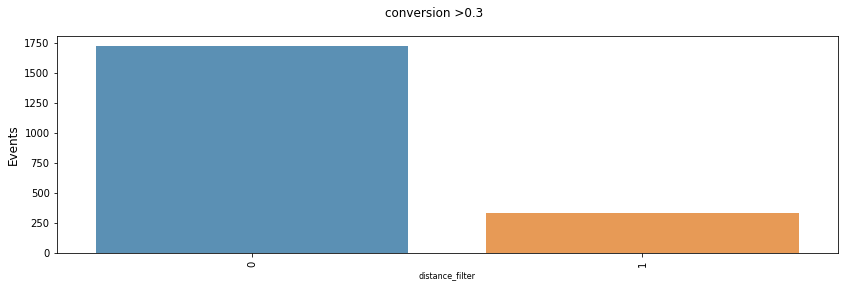

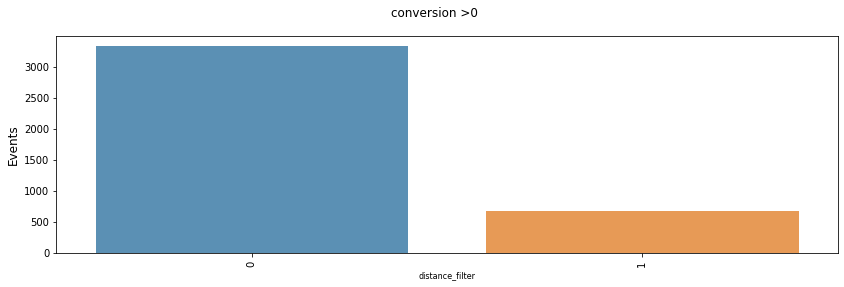

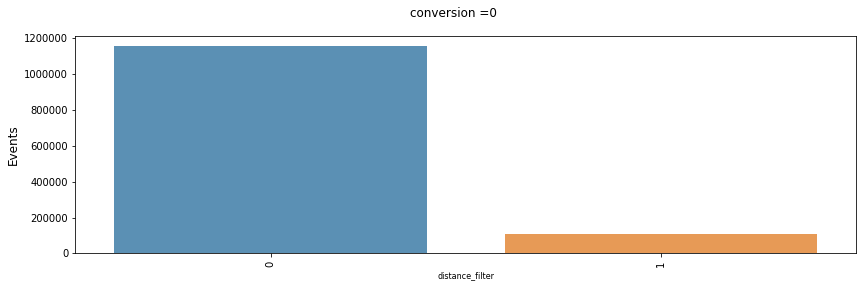

In [50]:
plot_for_conversions('distance_filter')

Уже кое что! Видимо, совсем далеко - плохо и негативно влияет на конверсию.

#assumption Более близкие предложения лучше конвертируются в контакты. Топ показываемых предолжений можно сортировать по близости.

In [51]:
with_filter = df_r[(df_r['conversion']>0) & (df_r['distance_filter']==1)].size
without_filter = df_r[(df_r['conversion']>0) & (df_r['distance_filter']==0)].size

print('С фильтром по дистации конверсий, %: {0}'.format(with_filter/(with_filter+without_filter)))

С фильтром по дистации конверсий, %: 0.16974538192710933


In [52]:
Идем дальше.

SyntaxError: invalid syntax (<ipython-input-52-669d1492857c>, line 1)

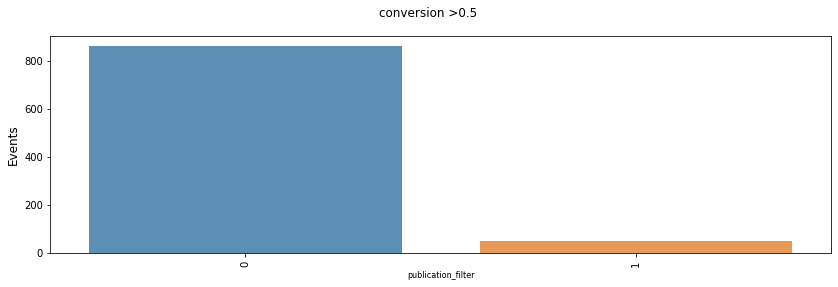

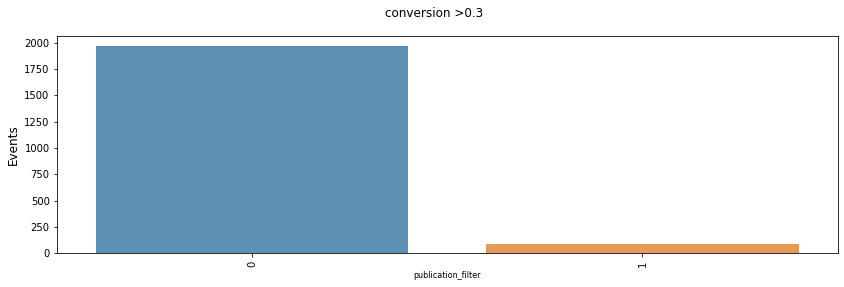

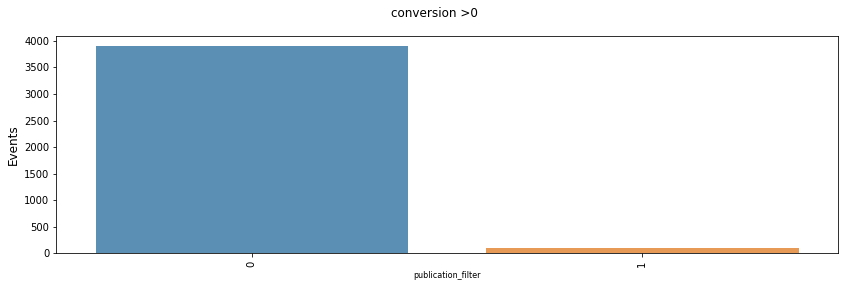

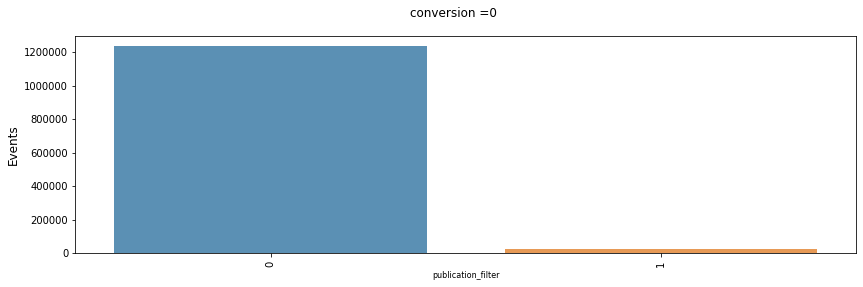

In [53]:
plot_for_conversions('publication_filter')

Либо искали какое-то конкретое объявление в диапазоне дат, либо ограничи историю в глубину.

#assumption Более свежие объявления лучше конвертируются.

In [54]:
with_filter = df_r[(df_r['conversion']>0) & (df_r['publication_filter']==1)].size
without_filter = df_r[(df_r['conversion']>0) & (df_r['publication_filter']==0)].size

print('С фильтром по дате публикации, %: {0}'.format(with_filter/(with_filter+without_filter)))

С фильтром по дате публикации, %: 0.02745881178232651


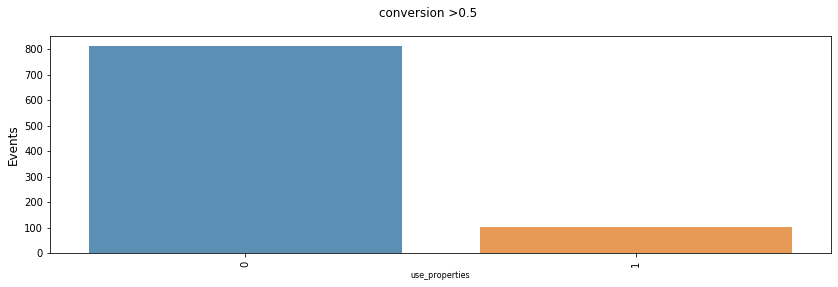

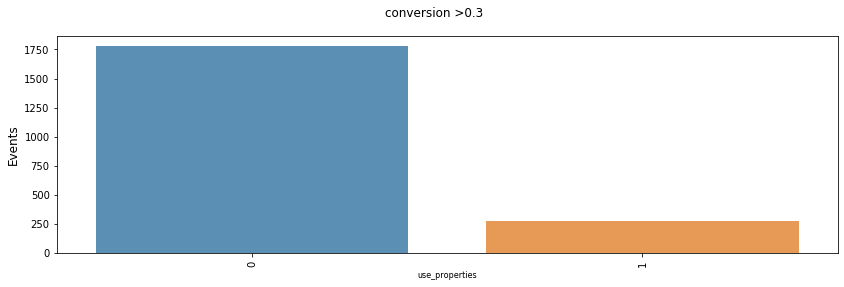

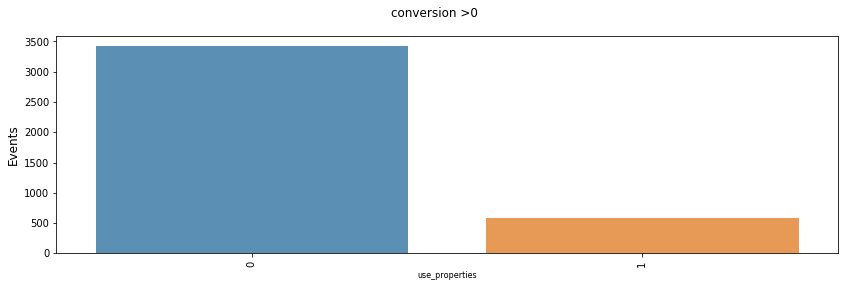

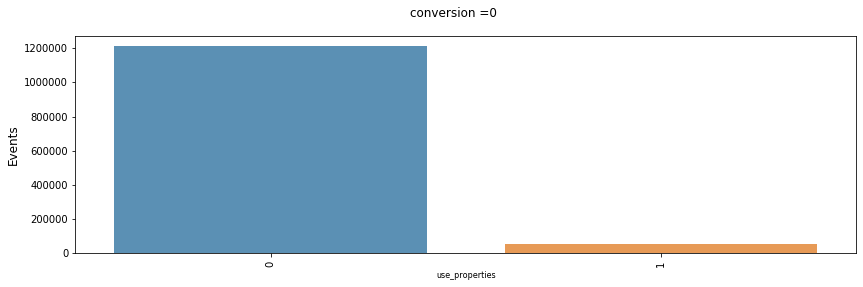

In [55]:
plot_for_conversions('use_properties')

В целом, похоже на правду. Чем больше уточнений, тем понятей хотелка и больше вероятность покупки.

#assumption Товары с большим количеством уточняющих свойств, характерных для категории лучше конвертируются в контакты. Можно поощрять оставлять "продавцов" данные о товаре, а покупателям показывать "самые важные" характеристики товара в карточке превью.

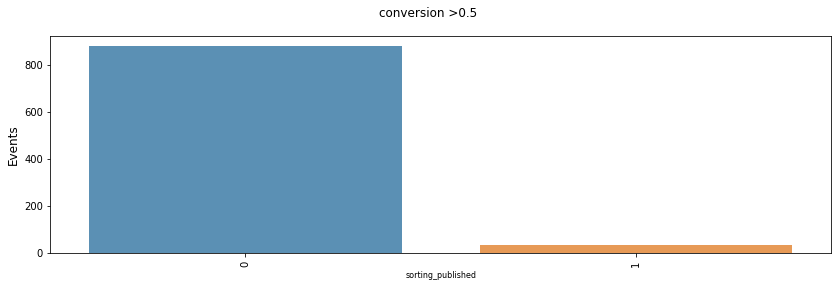

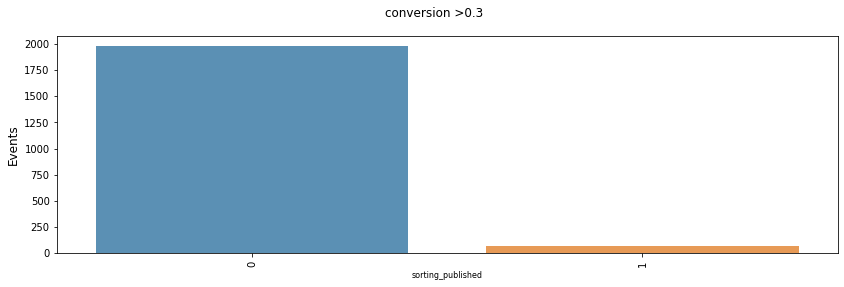

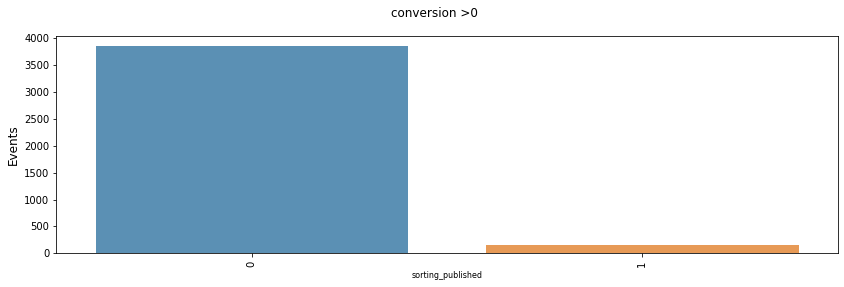

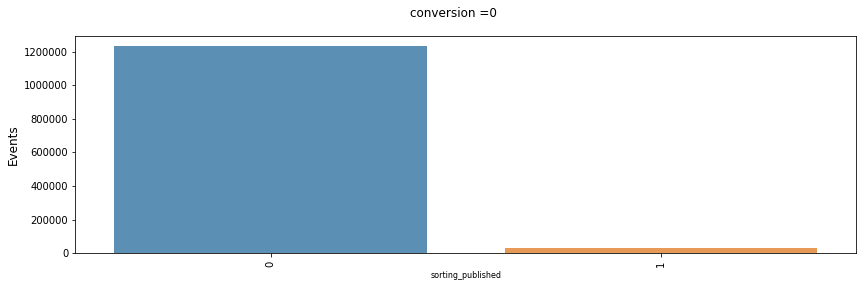

In [56]:
plot_for_conversions('sorting_published')

Новые конвертируются лучше, в целом и publication_filter на это намекает.

In [57]:
with_filter = df_r[(df_r['conversion']>0) & (df_r['sorting_published']==1)].size
without_filter = df_r[(df_r['conversion']>0) & (df_r['sorting_published']==0)].size

print('С фильтром сортировка по новизне, %: {0}'.format(with_filter/(with_filter+without_filter)))

С фильтром сортировка по новизне, %: 0.04068896655017474


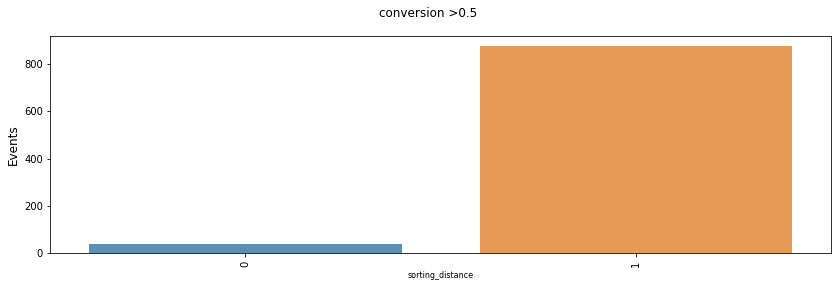

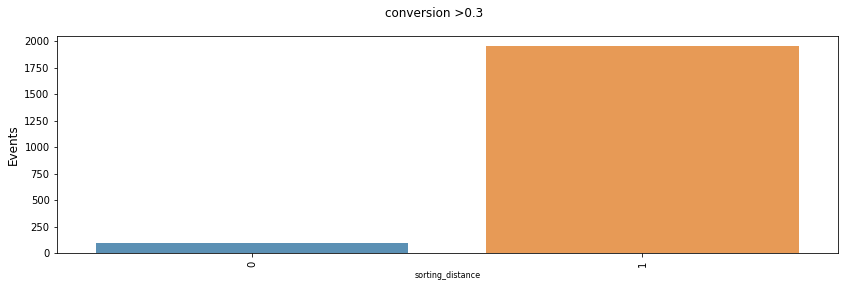

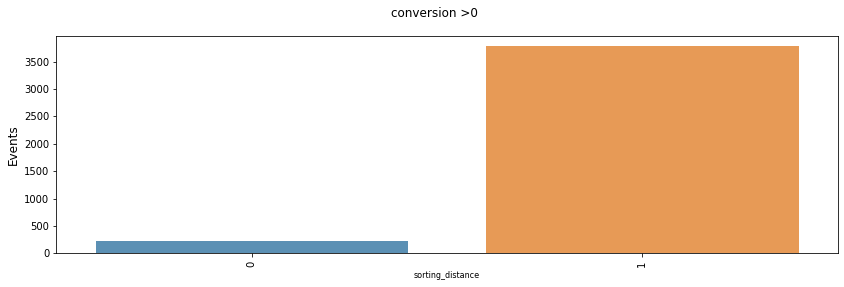

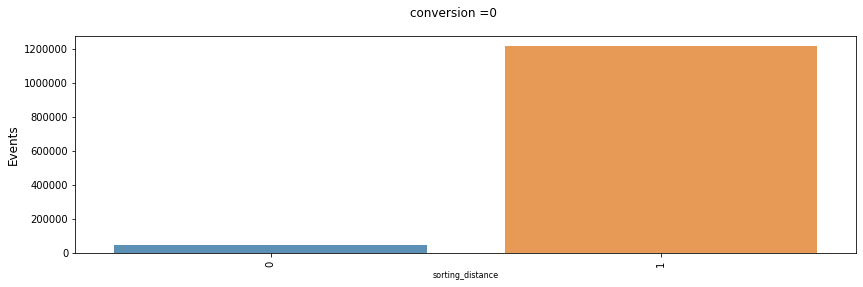

In [58]:
plot_for_conversions('sorting_distance')

ТА-ДА-ДА-ДАМ. Ближе - лучше, ну конечно) distance_filter тоже на это намекает. Вообще выглядит так, что в дефолтном поиске это уже встроено, правда?

In [59]:
with_filter = df_r[(df_r['conversion']>0) & (df_r['sorting_distance']==1)].size
without_filter = df_r[(df_r['conversion']>0) & (df_r['sorting_distance']==0)].size

print('С фильтром сортировка по новизне, %: {0}'.format(with_filter/(with_filter+without_filter)))

С фильтром сортировка по новизне, %: 0.9430853719420869


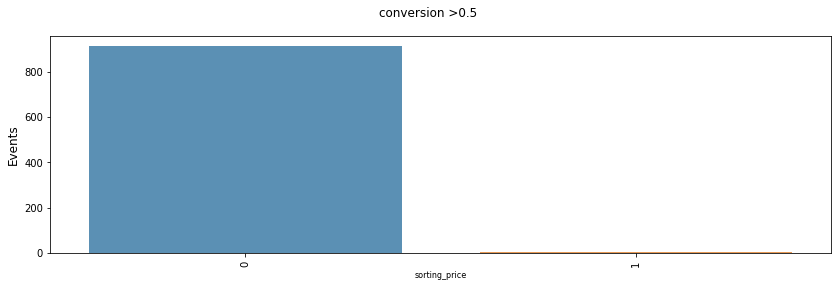

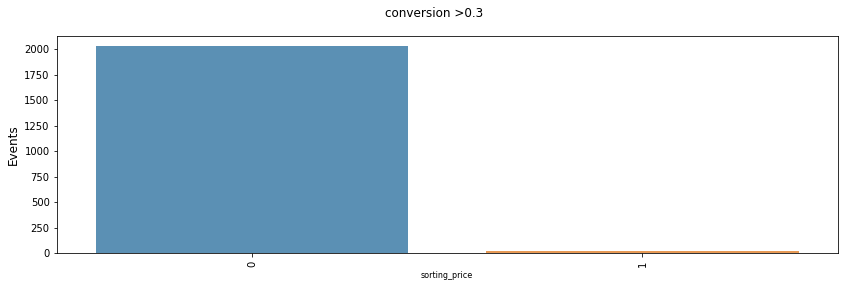

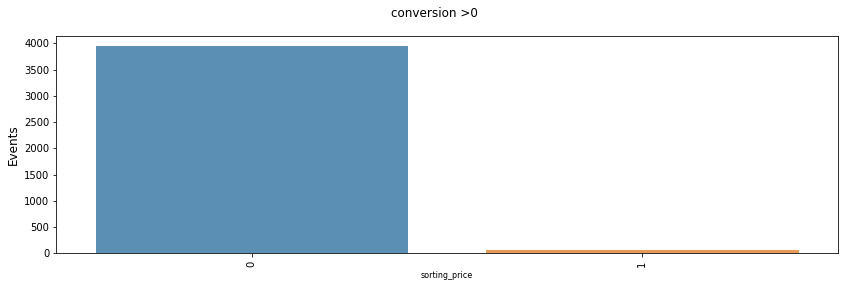

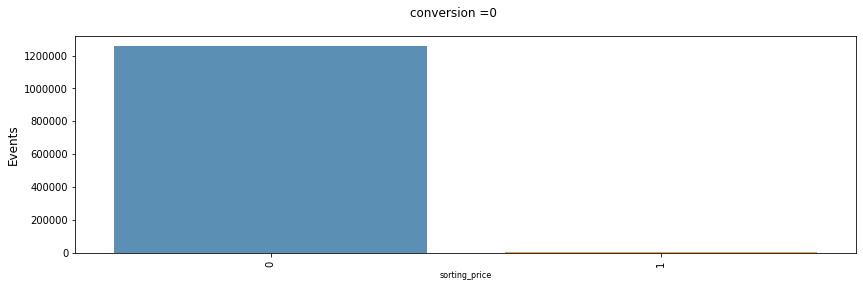

In [60]:
plot_for_conversions('sorting_price')

А это, скорей, неожиданный результат. Возможно, сортировка по цене работает "по умолчанию".

In [61]:
with_filter = df_r[(df_r['conversion']>0) & (df_r['sorting_price']==1)].size
without_filter = df_r[(df_r['conversion']>0) & (df_r['sorting_price']==0)].size

print('С фильтром сортировка по новизне, %: {0}'.format(with_filter/(with_filter+without_filter)))

С фильтром сортировка по новизне, %: 0.016225661507738392


# Выводы